In [154]:
from statsbombpy import sb
import pandas as pd

pd.set_option('display.max_columns', None)

In [155]:
free_comps = sb.competitions()
#free_comps

# internationals = free_comps[free_comps['competition_international'] == True]
# internationals
# La Liga competition_id is 11, all years from 2004/2005 until 2020/2021 but only games where messi has played
# sb.matches(competition_id=11, season_id=22)

# comps_with_events = free_comps[free_comps['match_available'] == True]
# print(comps_with_events[['competition_name', 'season_name']])

c:\Users\pavle\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [ ]:
events = sb.competition_events(
    country="Europe",
    division= "UEFA Euro",
    season="2024",
    gender="male"
)

grouped_events = sb.competition_events(
    country="Europe",
    division= "UEFA Euro",
    season="2024",
    split=True
)
# Display available event types in grouped_events
list(grouped_events.keys())

events.to_csv('euro2024_events.csv', index=False)

c:\Users\pavle\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


['starting_xis',
 'half_starts',
 'passes',
 'ball_receipts',
 'carrys',
 'pressures',
 'miscontrols',
 'ball_recoverys',
 'foul_committeds',
 'foul_wons',
 'dribbled_pasts',
 'dribbles',
 'blocks',
 'interceptions',
 'duels',
 'goal_keepers',
 'clearances',
 'dispossesseds',
 'shots',
 'injury_stoppages',
 'player_offs',
 'player_ons',
 'referee_ball_drops',
 '50/50s',
 'substitutions',
 'tactical_shifts',
 'half_ends',
 'bad_behaviours',
 'shields',
 'errors',
 'own_goal_againsts',
 'own_goal_fors',
 'offsides']

In [168]:
shots_euro = grouped_events['shots']
print(shots_euro.shape)
shots_euro.head(1)

(1340, 40)


,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,team,player,position,location,duration,related_events,match_id,shot_statsbomb_xg,shot_end_location,shot_technique,shot_body_part,shot_type,shot_outcome,shot_freeze_frame,possession_team_id,team_id,player_id,shot_key_pass_id,shot_first_time,out,under_pressure,shot_aerial_won,shot_deflected,shot_one_on_one,shot_open_goal,shot_saved_to_post,off_camera,shot_follows_dribble,shot_saved_off_target,shot_redirect
0,e0159fb4-47e8-422e-9216-6e44cf173408,342,1,00:06:41.445,6,41,Shot,11,Netherlands,Regular Play,Netherlands,Xavi Simons,Center Attacking Midfield,"[99.6, 51.2]",0.865482,[5820106f-bcbd-4d37-afe0-88d3cf9baf73],3942819,0.048935,"[120.0, 37.4, 2.0]",Normal,Right Foot,Open Play,Goal,"[{'location': [99.2, 65.4], 'player': {'id': 1...",941,941,39167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
all_penalties = shots_euro[shots_euro['shot_type'] == 'Penalty']
#  all_penalties[['shot_end_location', 'shot_outcome']]

for column in all_penalties.columns:
    print(f"{column}: {all_penalties[column].value_counts()}") 
    # print out value counts for columns where we have 1 unique value 
    print('------------------------------------------')  


id: id
edf7aa7b-0c91-451b-b980-b4dc582aa0b1    1
f2cd842b-e269-4909-bde6-924174f98926    1
38abf71d-a9fe-43fa-9d72-5b0ff8c63275    1
3dd7784b-a58f-4233-96d1-8b359aa68927    1
368a0fe9-e4de-4af4-abf5-c134aa2838f3    1
bac91cf2-d5dd-48e6-8d5d-963edd5f4ac6    1
d4cb12b1-96e4-4c6c-99c7-aa9e3d49f781    1
735f7413-a854-4ba5-b416-caf192cc2ac7    1
12523795-402c-497e-bd85-fa71b43e0c2d    1
7936f7c8-52e0-4f3e-b794-fc0ec7e67674    1
d2dc6d03-13c9-49bd-b3b1-35bf4e4c8660    1
d14c3304-dfc8-4624-8e49-e3aac0cf7968    1
36a5250d-6b1f-4555-828e-07d133c4569a    1
ead9c373-f877-43de-88f0-d4bc4b6c1f60    1
f49fdcbd-4933-4062-bc7a-c2d6bc4e97e7    1
7198adbd-d884-4124-8278-beff2f7ab567    1
357f71b4-1acf-4690-b395-29024a2823d6    1
1befa2b2-fa0c-43ce-8d39-89db1e90b7cc    1
271034db-1047-4c8f-8e9b-85f2a09b93f9    1
74444910-3576-4cb3-971d-0161e52348ff    1
01964c87-8488-4aca-a49b-dadf85fb76a0    1
412f93e3-e725-418b-85f7-7983c66d6065    1
40720cde-d513-4961-bbb6-436f9dba95d2    1
7a231cb8-9d27-40f4-ae21-ab3

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

def plot_penalty_shotmap(
    shots_df: pd.DataFrame,
    outcome_col: str = 'shot_outcome',
    title: str = 'Euros 2024 all penalties',
    *,
    # visuals
    draw_net: bool = True,
    net_spacing: float = 0.35,
    net_alpha: float = 0.18,
    show_penalty_spot: bool = True,
    show_penalty_arc: bool = True,
    spot_offset: float = 2.5,
    jitter: float = 0.05,
    figsize=(12, 7),
    theme: str = "dark",  # "dark" (green), "print" (white), "black" (black)
):
    """
    Plot a penalty shot map with correct proportions, overlap jitter,
    compact KPIs, and selectable themes.
    """

    # ---------- Theme presets ----------
    theme = theme.lower()
    if theme == "white":
        PITCH_BG  = "#f7f7f7"
        LINE_COLOR = "#333333"
        NET_COLOR  = "#aaaaaa"
        TEXT_COLOR = "#111111"
        LEGEND_FACE = "#ffffff"
        EDGE_COLOR = "#333333"
    elif theme == "black":
        PITCH_BG  = "#000000"
        LINE_COLOR = "#e6e6e6"
        NET_COLOR  = "#e6e6e6"
        TEXT_COLOR = "#e6e6e6"
        LEGEND_FACE = "#111111"
        EDGE_COLOR = "#e6e6e6"
    elif theme == "green":  # "dark" green pitch
        PITCH_BG  = "#2d5e2e"
        LINE_COLOR = "white"
        NET_COLOR  = "white"
        TEXT_COLOR = "black"
        LEGEND_FACE = "#dce7d1"
        EDGE_COLOR = "white"
    else: 
        pass


    # Color-blind-safe points
    GOAL_COLOR = "#1f77b4"   # blue
    MISS_COLOR = "#ff7f0e"   # orange

    # ---------- Data prep ----------
    penalties = shots_df.loc[shots_df['shot_type'] == 'Penalty'].copy()
    penalties[['end_x', 'end_y', 'end_z']] = pd.DataFrame(
        penalties['shot_end_location'].tolist(), index=penalties.index
    )

    # ---------- Geometry (StatsBomb coords) ----------
    GOAL_Y_MIN = 36.0
    GOAL_Y_MAX = 44.0
    GOAL_WIDTH = GOAL_Y_MAX - GOAL_Y_MIN  # 8 units (≈7.32m)
    GOAL_CENTER_Y = 40.0
    GOAL_Z_MAX = 2.67

    SIX_YARD_BOX_HALF_WIDTH = 10.0  # ~9.16m ≈ ~10 SB units
    SIX_YARD_DEPTH = 5.5            # meters (drawn downward here)

    penalties['is_goal'] = penalties[outcome_col].astype(str).eq('Goal')
    total = len(penalties)
    goals = int(penalties['is_goal'].sum())
    not_goals = total - goals

    # ---------- Figure ----------
    fig, ax = plt.subplots(figsize=figsize)
    fig.patch.set_facecolor(PITCH_BG)
    ax.set_facecolor(PITCH_BG)

    # --- Optional net (behind points) ---
    if draw_net:
        for y in np.arange(GOAL_Y_MIN + net_spacing, GOAL_Y_MAX, net_spacing):
            ax.plot([y, y], [0, GOAL_Z_MAX], lw=0.8, color=NET_COLOR, alpha=net_alpha, zorder=1)
        for z in np.arange(net_spacing, GOAL_Z_MAX, net_spacing):
            ax.plot([GOAL_Y_MIN, GOAL_Y_MAX], [z, z], lw=0.8, color=NET_COLOR, alpha=net_alpha, zorder=1)

    # --- Pitch/goal markings ---
    PITCH_LINE_WIDTH = 1.6

    # Compute bounds so six-yard box is fully visible
    left_box_y  = GOAL_CENTER_Y - SIX_YARD_BOX_HALF_WIDTH  # 30
    right_box_y = GOAL_CENTER_Y + SIX_YARD_BOX_HALF_WIDTH  # 50
    
    # space reserved on the right for the KPI column (in SB y-units)
    kpi_pad = 2.0
    left_margin = 2.0

    # what we must show at minimum (geometry + KPI area)
    geom_left_req  = min(GOAL_Y_MIN - 1, left_box_y - left_margin)
    geom_right_req = max(GOAL_Y_MAX + 1, right_box_y) + kpi_pad

    # make the span symmetric around the goal center
    half_span = max(GOAL_CENTER_Y - geom_left_req, geom_right_req - GOAL_CENTER_Y)
    x_left  = GOAL_CENTER_Y - half_span
    x_right = GOAL_CENTER_Y + half_span

    # Goal line (extended across full width)
    ax.plot([x_left, x_right], [0, 0], color=LINE_COLOR, lw=PITCH_LINE_WIDTH, zorder=2)

    # Six-yard box (correct width)
    ax.plot([left_box_y, left_box_y], [0, -SIX_YARD_DEPTH],
            color=LINE_COLOR, lw=PITCH_LINE_WIDTH, zorder=2)
    ax.plot([right_box_y, right_box_y], [0, -SIX_YARD_DEPTH],
            color=LINE_COLOR, lw=PITCH_LINE_WIDTH, zorder=2)
    ax.plot([left_box_y, right_box_y], [-SIX_YARD_DEPTH, -SIX_YARD_DEPTH],
            color=LINE_COLOR, lw=PITCH_LINE_WIDTH, zorder=2)

    # Goal frame
    goal_rect = Rectangle((GOAL_Y_MIN, 0), GOAL_WIDTH, GOAL_Z_MAX,
                          fill=False, linewidth=3, edgecolor=LINE_COLOR, zorder=2)
    ax.add_patch(goal_rect)

    # Optional penalty arc (faint hint)
    if show_penalty_arc:
        arc_y = np.linspace(GOAL_CENTER_Y - 7, GOAL_CENTER_Y + 7, 100)
        arc_z = -spot_offset + 0.05*np.sin(np.linspace(-np.pi/2, np.pi/2, 100))
        ax.plot(arc_y, arc_z, linestyle='--', color=LINE_COLOR, alpha=0.15, lw=1.2, zorder=2)

    # Penalty spot cue
    if show_penalty_spot:
        ax.plot([GOAL_CENTER_Y - 0.12, GOAL_CENTER_Y + 0.12],
                [-spot_offset, -spot_offset],
                color=LINE_COLOR, lw=3, solid_capstyle='round', zorder=2)

    # --- Points with small jitter ---
    def marker_shape(period):
        return 'o' if int(period) == 5 else '^'  # circle=shootout, triangle=regular

    for _, row in penalties.iterrows():
        y = row['end_y'] + np.random.uniform(-jitter, jitter)
        z = row['end_z'] + np.random.uniform(-jitter, jitter)
        color = GOAL_COLOR if row['is_goal'] else MISS_COLOR
        edge = EDGE_COLOR if theme != "dark" else "black"
        ax.scatter(y, z, s=100, alpha=0.95, facecolors=color, edgecolors=edge,
                   linewidth=1.0, marker=marker_shape(row['period']), zorder=3)

    # --- Axes & title ---
    ax.set_xlim(x_left, x_right)
    ax.set_ylim(-3, GOAL_Z_MAX + 0.6)
    ax.set_aspect('equal', adjustable='box')
    for s in ax.spines.values():
        s.set_visible(False)
    ax.grid(False)
    ax.axis('off')
    ax.set_title(title, color=TEXT_COLOR, pad=12, fontsize=18, fontweight='bold')

    # --- Legend (actual combos) ---
    legend_handles = [
        Line2D([0], [0], marker='o', linestyle='None', markersize=11,
               markerfacecolor=GOAL_COLOR, markeredgecolor=edge, label='Goal • Shootout'),
        Line2D([0], [0], marker='o', linestyle='None', markersize=11,
               markerfacecolor=MISS_COLOR, markeredgecolor=edge, label='Missed/Saved • Shootout'),
        Line2D([0], [0], marker='^', linestyle='None', markersize=11,
               markerfacecolor=GOAL_COLOR, markeredgecolor=edge, label='Goal • Regular'),
        Line2D([0], [0], marker='^', linestyle='None', markersize=11,
               markerfacecolor=MISS_COLOR, markeredgecolor=edge, label='Missed/Saved • Regular'),
    ]
    leg = ax.legend(handles=legend_handles, loc='upper left', frameon=True, fontsize=10)
    leg.get_frame().set_facecolor(LEGEND_FACE)
    leg.get_frame().set_edgecolor(edge)
    for txt in leg.get_texts():
        txt.set_color(TEXT_COLOR)

    # --- KPI block (compact) ---
    shootout_count = int((penalties['period'] == 5).sum())
    regular_count  = int((penalties['period'] != 5).sum())

    miss_types = penalties.loc[~penalties['is_goal'], outcome_col].value_counts().sort_index()

    body_part_counts = penalties['shot_body_part'].value_counts()
    right_foot = int(body_part_counts.get('Right Foot', 0))
    left_foot  = int(body_part_counts.get('Left Foot', 0))
    rf_pct = 100 * right_foot / total if total else 0
    lf_pct = 100 * left_foot  / total if total else 0
    goal_rate = 100 * goals / total if total else 0

    kx = x_right #- (kpi_pad - 1)
    ky = GOAL_Z_MAX + 0.05

    ax.text(kx, ky,
            f"{total} penalties — {goals} goals ({goal_rate:.1f}%)",
            ha='left', va='top', fontsize=12, color=TEXT_COLOR)
    ky -= 0.1

    for miss_type, count in miss_types.items():
        ax.text(kx + 0.5, ky, f"• {count} {miss_type}",
                color=MISS_COLOR, ha='left', va='top', fontsize=11)
        ky -= 0.28

    ky -= 0.10
    ax.text(kx, ky, f"Right: {right_foot} ({rf_pct:.0f}%) • Left: {left_foot} ({lf_pct:.0f}%)",
            ha='left', va='top', fontsize=11, color=TEXT_COLOR)
    ky -= 0.35
    ax.text(kx, ky, f"Regular: {regular_count} • Shootout: {shootout_count}",
            ha='left', va='top', fontsize=11, color=TEXT_COLOR)

    plt.tight_layout()
    plt.show()


In [163]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def draw_goal(
    *,
    theme: str = "green",              
    figsize=(12, 6),
    depth_scale: float = 0.2,         # meters -> plot units (vertical scaling)
    width_scale: float = 3.0,         # how many goal widths to show horizontally
    draw_net: bool = True,
    net_spacing: float = 0.35,
    net_alpha: float = 0.18,
    show_penalty_spot: bool = True,
    show_six_yard_box: bool = True,
    show_penalty_area: bool = True,
    penalty_spot_distance: float = 11.0, 
    six_yard_depth: float = 5.5,          
    penalty_area_depth: float = 16.5,     
    title: str | None = "Penalty Area View",
):
    """
    Zoomed penalty view where the goal is the main feature.
    - Vertical axis compressed by depth_scale.
    - Horizontal axis is scaled relative to the goal's width.
    """
    # ---------- Theme ----------
    t = theme.lower()
    if t == "white":
        PITCH_BG, LINE, NET, TEXT = "#f7f7f7", "#333333", "#aaaaaa", "#111111"
    elif t == "black":
        PITCH_BG, LINE, NET, TEXT = "#000000", "#e6e6e6", "#e6e6e6", "#e6e6e6"
    else:  # green
        PITCH_BG, LINE, NET, TEXT = "#2d5e2e", "white", "white", "black"

    # ---------- Geometry ----------
    GOAL_Y_MIN, GOAL_Y_MAX = 36.0, 44.0
    GOAL_CENTER_Y, GOAL_Z_MAX = 40.0, 2.67
    GOAL_WIDTH = GOAL_Y_MAX - GOAL_Y_MIN  # 8 SB units (~7.32m)

    # Boxes in SB units
    SIX_LEFT, SIX_RIGHT = 30.0, 50.0
    PEN_LEFT, PEN_RIGHT = 18.0, 62.0

    # Vertical compression
    def z_m(d_m): 
        return -d_m * depth_scale
    z_six = z_m(six_yard_depth)
    z_pen = z_m(penalty_area_depth)
    z_spot = z_m(penalty_spot_distance)

    # Horizontal view scaled to goal width
    span = GOAL_WIDTH * width_scale / 2
    x_left = GOAL_CENTER_Y - span
    x_right = GOAL_CENTER_Y + span

    # ---------- Figure ----------
    fig, ax = plt.subplots(figsize=figsize)
    fig.patch.set_facecolor(PITCH_BG)
    ax.set_facecolor(PITCH_BG)
    lw = 1.6

    # Goal line
    ax.plot([x_left, x_right], [0, 0], color=LINE, lw=lw, zorder=2)

    # Goal frame
    goal_rect = Rectangle((GOAL_Y_MIN, 0), GOAL_WIDTH, GOAL_Z_MAX,
                          fill=False, linewidth=3, edgecolor=LINE, zorder=4)
    ax.add_patch(goal_rect)

    # Net
    if draw_net:
        for y in np.arange(GOAL_Y_MIN + net_spacing, GOAL_Y_MAX, net_spacing):
            ax.plot([y, y], [0, GOAL_Z_MAX], lw=0.8, color=NET, alpha=net_alpha, zorder=1)
        for z in np.arange(net_spacing, GOAL_Z_MAX, net_spacing):
            ax.plot([GOAL_Y_MIN, GOAL_Y_MAX], [z, z], lw=0.8, color=NET, alpha=net_alpha, zorder=1)

    # 6-yard box (only draw if within cropped view)
    if show_six_yard_box:
        ax.plot([SIX_LEFT, SIX_LEFT],   [0, z_six], color=LINE, lw=lw, zorder=3)
        ax.plot([SIX_RIGHT, SIX_RIGHT], [0, z_six], color=LINE, lw=lw, zorder=3)
        ax.plot([SIX_LEFT, SIX_RIGHT],  [z_six, z_six], color=LINE, lw=lw, zorder=3)

    # 18-yard box
    if show_penalty_area:
        ax.plot([PEN_LEFT, PEN_LEFT],   [0, z_pen], color=LINE, lw=lw, zorder=2)
        ax.plot([PEN_RIGHT, PEN_RIGHT], [0, z_pen], color=LINE, lw=lw, zorder=2)
        ax.plot([PEN_LEFT, PEN_RIGHT],  [z_pen, z_pen], color=LINE, lw=lw, zorder=2)

    # Penalty spot
    if show_penalty_spot:
        ax.plot([GOAL_CENTER_Y - 0.14, GOAL_CENTER_Y + 0.14],
                [z_spot, z_spot], color=LINE, lw=3, solid_capstyle='round', zorder=4)

    # Cosmetics
    ax.set_xlim(x_left, x_right)
    ax.set_ylim(z_pen - 0.5, GOAL_Z_MAX + 0.6)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')

    if title:
        ax.set_title(title, color=TEXT, pad=12, fontsize=16, fontweight='bold')

    plt.tight_layout()
    return fig, ax

In [164]:
from matplotlib.lines import Line2D

def plot_shot_locations(
    shots_df: pd.DataFrame,
    *,
    outcome_col: str = 'shot_outcome',
    jitter: float = 0.08,
    palette: str = 'neutral',  # 'vibrant', 'neutral', 'classic'
    **kwargs
):
    """
    Draws the goal using draw_goal and plots penalty locations on it,
    differentiating between regular play and shootouts, with styled KPIs.
    
    Args:
        palette (str): The color scheme for goals/misses.
            - 'vibrant': Blue for goals, orange for misses.
            - 'neutral': Dark gray for goals, light gray for misses.
            - 'classic': Green for goals, red for misses.
    """
    # 1. Draw the base goal visualization
    fig, ax = draw_goal(**kwargs)

    # 2. Prepare the penalty data
    penalties = shots_df.loc[shots_df['shot_type'] == 'Penalty'].copy()
    if penalties.empty:
        print("No penalty data to plot.")
        plt.show()
        return

    penalties[['end_x', 'end_y', 'end_z']] = pd.DataFrame(
        penalties['shot_end_location'].tolist(), index=penalties.index
    )
    penalties['is_goal'] = penalties[outcome_col].astype(str).eq('Goal')

    # 3. Define colors, fonts, and plot points based on palette
    if palette == 'vibrant':
        GOAL_COLOR = "#1f77b4"  # Blue
        MISS_COLOR = "#ff7f0e"  # Orange
    elif palette == 'classic':
        GOAL_COLOR = "#2ca02c"  # Green
        MISS_COLOR = "#d62728"  # Red
    else:  # 'neutral' is the default
        GOAL_COLOR = "#222222"  # Dark Gray
        MISS_COLOR = "#bbbbbb"  # Light Gray
    
    theme = kwargs.get("theme", "green")
    edge_color = "#333333" if theme == "white" else "black"
    text_color = "#111111" if theme == "white" else "white"
    legend_face = "#ffffff" if theme == "white" else "#dce7d1"
    if theme == "green":
        text_color = "black"

    # --- Use a unique font for all text elements ---
    font_props = {'family': 'DejaVu Sans Mono', 'weight': 'bold'}
    ax.set_title(kwargs.get("title", ""), color=text_color, pad=15, fontsize=18, **font_props)

    for _, row in penalties.iterrows():
        y = row['end_y'] + np.random.uniform(-jitter, jitter)
        z = row['end_z'] + np.random.uniform(-jitter, jitter)
        color = GOAL_COLOR if row['is_goal'] else MISS_COLOR
        marker = '^' if row['period'] != 5 else 'o'
        
        ax.scatter(
            y, z, s=120, alpha=0.9, facecolors=color, 
            edgecolors=edge_color, linewidth=1.2, zorder=5, marker=marker
        )

    # 4. Add a custom legend with the unique font
    legend_handles = [
        Line2D([0], [0], marker='^', linestyle='None', markersize=11,
               markerfacecolor=GOAL_COLOR, markeredgecolor=edge_color, label='Goal (Regular Play)'),
        Line2D([0], [0], marker='^', linestyle='None', markersize=11,
               markerfacecolor=MISS_COLOR, markeredgecolor=edge_color, label='No Goal (Regular Play)'),
        Line2D([0], [0], marker='o', linestyle='None', markersize=11,
               markerfacecolor=GOAL_COLOR, markeredgecolor=edge_color, label='Goal (Shootout)'),
        Line2D([0], [0], marker='o', linestyle='None', markersize=11,
               markerfacecolor=MISS_COLOR, markeredgecolor=edge_color, label='No Goal (Shootout)'),
    ]
    leg = ax.legend(handles=legend_handles, loc='upper left', frameon=True, fontsize=10)
    leg.get_frame().set_facecolor(legend_face)
    leg.get_frame().set_edgecolor(edge_color)
    for txt in leg.get_texts():
        txt.set_fontproperties(font_props)
        txt.set_color(text_color)

    # 5. Calculate and display structured KPIs on the right
    total = len(penalties)
    goals = int(penalties['is_goal'].sum())
    not_goals = total - goals
    goal_rate = 100 * goals / total if total else 0
    
    miss_types = penalties.loc[~penalties['is_goal'], outcome_col].value_counts().sort_index()
    
    body_part_counts = penalties['shot_body_part'].value_counts()
    right_foot = int(body_part_counts.get('Right Foot', 0))
    left_foot  = int(body_part_counts.get('Left Foot', 0))
    
    shootout_count = int((penalties['period'] == 5).sum())
    regular_count = total - shootout_count

    # Get plot coordinates for positioning
    x_right = ax.get_xlim()[1]
    y_top = ax.get_ylim()[1]
    
    # Position the structured KPI block with left alignment
    kx = 44.6  # Start text to the right of the goal
    ky = y_top + 0.1
    
    # --- Main Summary ---
    ax.text(kx, ky, f"{total} Total Penalties", ha='left', va='top', fontsize=14, color=text_color, **font_props)
    ky -= 0.4
    ax.text(kx, ky, f"{goals} Scored ({goal_rate:.1f}%)", ha='left', va='top', fontsize=13, color=GOAL_COLOR, **font_props)
    ky -= 0.4
    ax.text(kx, ky, f"{not_goals} Missed/Saved", ha='left', va='top', fontsize=13, color=MISS_COLOR, **font_props)
    
    # --- Miss Breakdown ---
    ky -= 0.35
    for miss_type, count in miss_types.items():
        ax.text(kx + 0.5, ky, f"• {count} {miss_type}", color=MISS_COLOR, ha='left', va='top', fontsize=12, **font_props)
        ky -= 0.3
    
    # --- Details Section ---
    ky -= 0.3
    ax.text(kx, ky, "Details", ha='left', va='top', fontsize=13, color=text_color, **font_props)
    ky -= 0.30

    # Align the '|' separator by padding the first part of the string
    part1_reg = f"Regular Play: {regular_count}"
    part1_foot = f"Right Foot: {right_foot}"
    max_len = max(len(part1_reg), len(part1_foot))

    line1 = f"{part1_reg:<{max_len}} | Shootout: {shootout_count}"
    line2 = f"{part1_foot:<{max_len}} | Left Foot: {left_foot}"

    ax.text(kx, ky, line1, ha='left', va='top', fontsize=12, color=text_color, **font_props)
    ky -= 0.3
    ax.text(kx, ky, line2, ha='left', va='top', fontsize=12, color=text_color, **font_props)

    plt.show()

In [171]:
def plot_penalties_by_filter(
    shots_df: pd.DataFrame,
    *,
    player_name: str | None = None,
    team_name: str | None = None,
    **kwargs
):
    """
    Filters penalties for a specific player or team and plots them
    using the main plot_shot_locations function.
    """
    # Ensure we are only working with penalties from the start
    penalties_df = shots_df[shots_df['shot_type'] == 'Penalty'].copy()

    if player_name:
        filtered_df = penalties_df[penalties_df['player'] == player_name].copy()
        title = f"Penalty Analysis for {player_name}"
    elif team_name:
        filtered_df = penalties_df[penalties_df['team'] == team_name].copy()
        title = f"Penalty Analysis for {team_name}"
    else:
        print("Please provide a player_name or team_name to filter by.")
        return

    if filtered_df.empty:
        filter_type = "player" if player_name else "team"
        filter_value = player_name or team_name
        print(f"No penalty data found for {filter_type}: {filter_value}")
        return
    
    # Update title in kwargs or set it if not present
    kwargs['title'] = title
    
    plot_shot_locations(filtered_df, **kwargs)

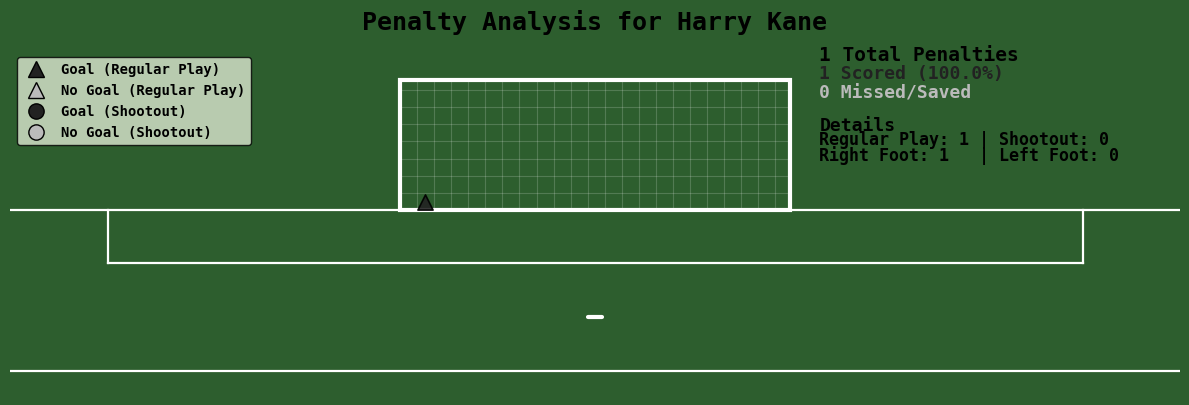

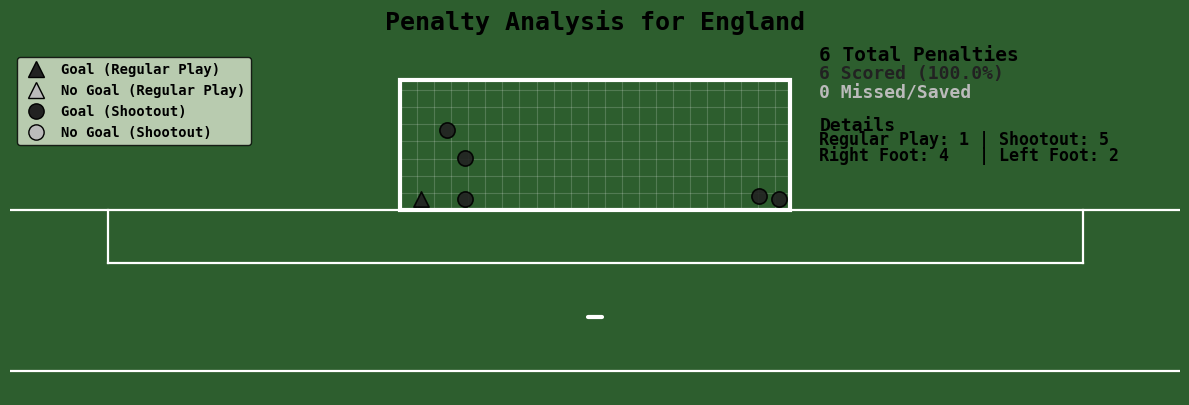

In [177]:
# --- Example 1: Plot penalties for a specific player ---
plot_penalties_by_filter(
    shots_euro,
    player_name="Harry Kane",
    theme="green",
    palette="neutral"
)

# --- Example 2: Plot penalties for a specific team ---
plot_penalties_by_filter(
    shots_euro,
    team_name="England",
    theme="green",
    palette="neutral"
)